### Optimizing Diabetes Prediction Models through Machine Learning and Hyperparameter Tuning

### Importing Libraries and Loading Data

In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Reading data from csv
data = pd.read_csv("diabetes.csv")

### Checking Dataset and Properties

In [3]:
# Check frist five rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check the datatypes and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Statistical properties of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [3]:
# Iterate through each column to find number of zeros
for col_name in data.columns:
    zero_count = (data[col_name] == 0).sum()
    print(f"{col_name}:\t\t\t{zero_count}")

Pregnancies:			111
Glucose:			5
BloodPressure:			35
SkinThickness:			227
Insulin:			374
BMI:			11
DiabetesPedigreeFunction:			0
Age:			0
Outcome:			500


 *For variables like 'Pregnancies' and 'Outcome' a zero is a valid value. However, for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI', a zero is physiologically impossible, indicating a missing data.*

### Visualizing Dataset

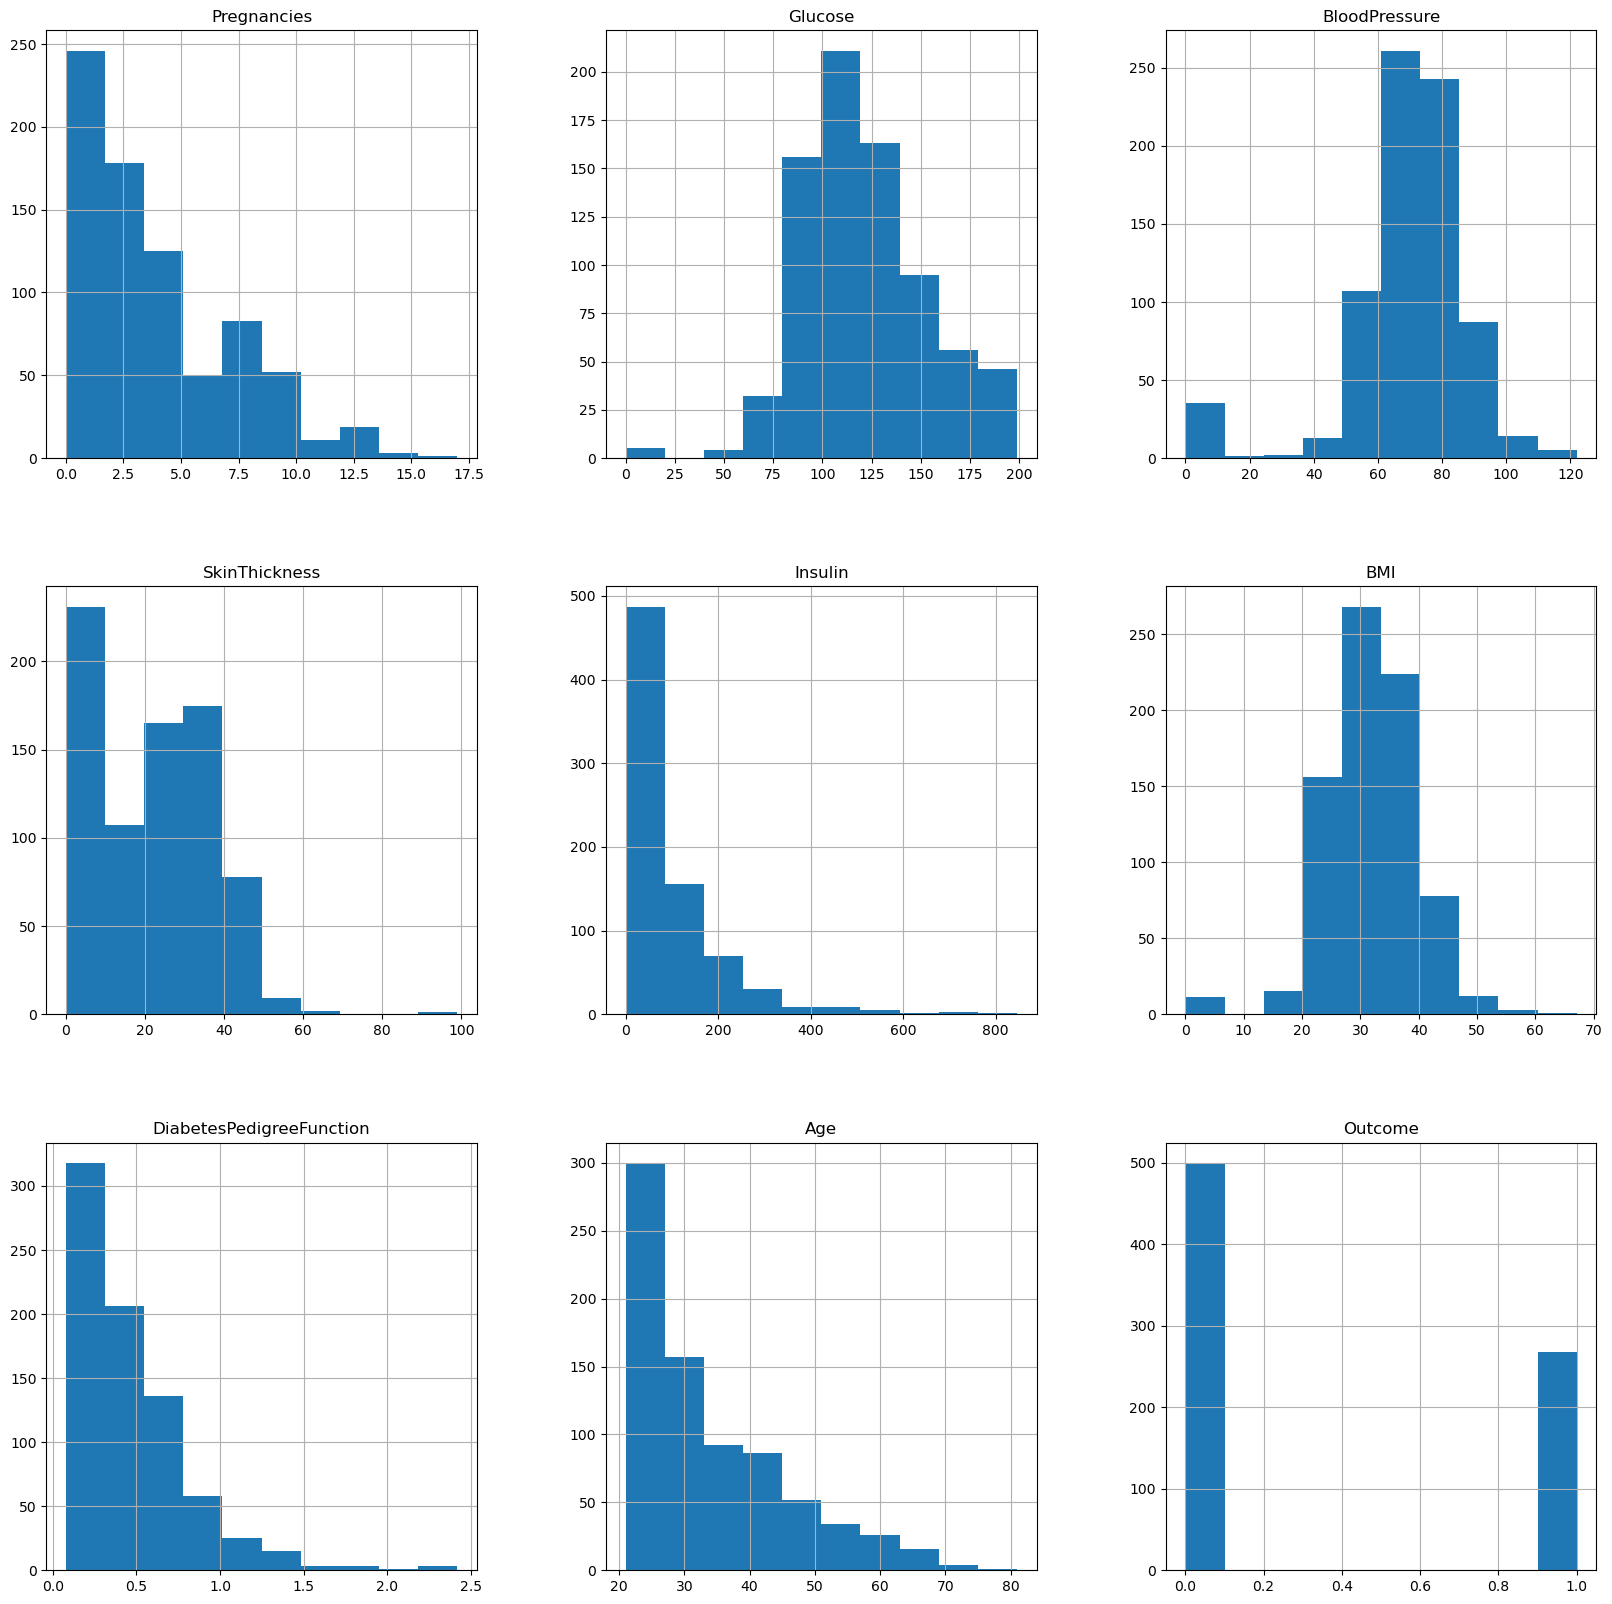

In [4]:
# Ploting histogram for each column
plot = data.hist(figsize = (20,20))

### Data Preprocessing

In [5]:
# Remove all the rows where the value of Glucose or BMI is zero
data = data[(data[['Glucose', 'BMI']] != 0).all(axis=1)]

In [6]:
# Calculate the median BloodPressure excluding zero values
median_bp = data[data['BloodPressure'] != 0]['BloodPressure'].median()

# Replace zeroes in BloodPressure with the median
data['BloodPressure'] = data['BloodPressure'].replace(0, median_bp)

In [7]:
# Replace zeroes with NaN for KNN Imputer
data[['SkinThickness', 'Insulin']] = data[['SkinThickness', 'Insulin']].replace(0, np.nan)

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the column
data[['SkinThickness', 'Insulin']] = imputer.fit_transform(data[['SkinThickness', 'Insulin']])

# Convert back to integer
data[['SkinThickness', 'Insulin']] = data[['SkinThickness', 'Insulin']].astype(int)

In [8]:
# Iterate through each column to find number of zeros
for col_name in data.columns:
    zero_count = (data[col_name] == 0).sum()
    print(f"{col_name}:\t\t\t{zero_count}")

Pregnancies:			108
Glucose:			0
BloodPressure:			0
SkinThickness:			0
Insulin:			0
BMI:			0
DiabetesPedigreeFunction:			0
Age:			0
Outcome:			488


In [9]:
# Check frist five rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,232,33.6,0.627,50,1
1,1,85,66,29,140,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Statistical properties of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,752.0,3.851064,3.375189,0.000,1.000,3.000,6.0000,17.00
Glucose,752.0,121.941489,30.601198,44.000,99.750,117.000,141.0000,199.00
BloodPressure,752.0,72.385638,12.147132,24.000,64.000,72.000,80.0000,122.00
SkinThickness,752.0,29.122340,8.852448,7.000,25.000,29.000,32.0000,99.00
Insulin,752.0,153.460106,88.030279,14.000,105.000,156.000,160.0000,846.00
BMI,752.0,32.454654,6.928926,18.200,27.500,32.300,36.6000,67.10
DiabetesPedigreeFunction,752.0,0.473051,0.330108,0.078,0.244,0.377,0.6275,2.42
Age,752.0,33.312500,11.709395,21.000,24.000,29.000,41.0000,81.00
Outcome,752.0,0.351064,0.477621,0.000,0.000,0.000,1.0000,1.00


### Data Visualization for Model

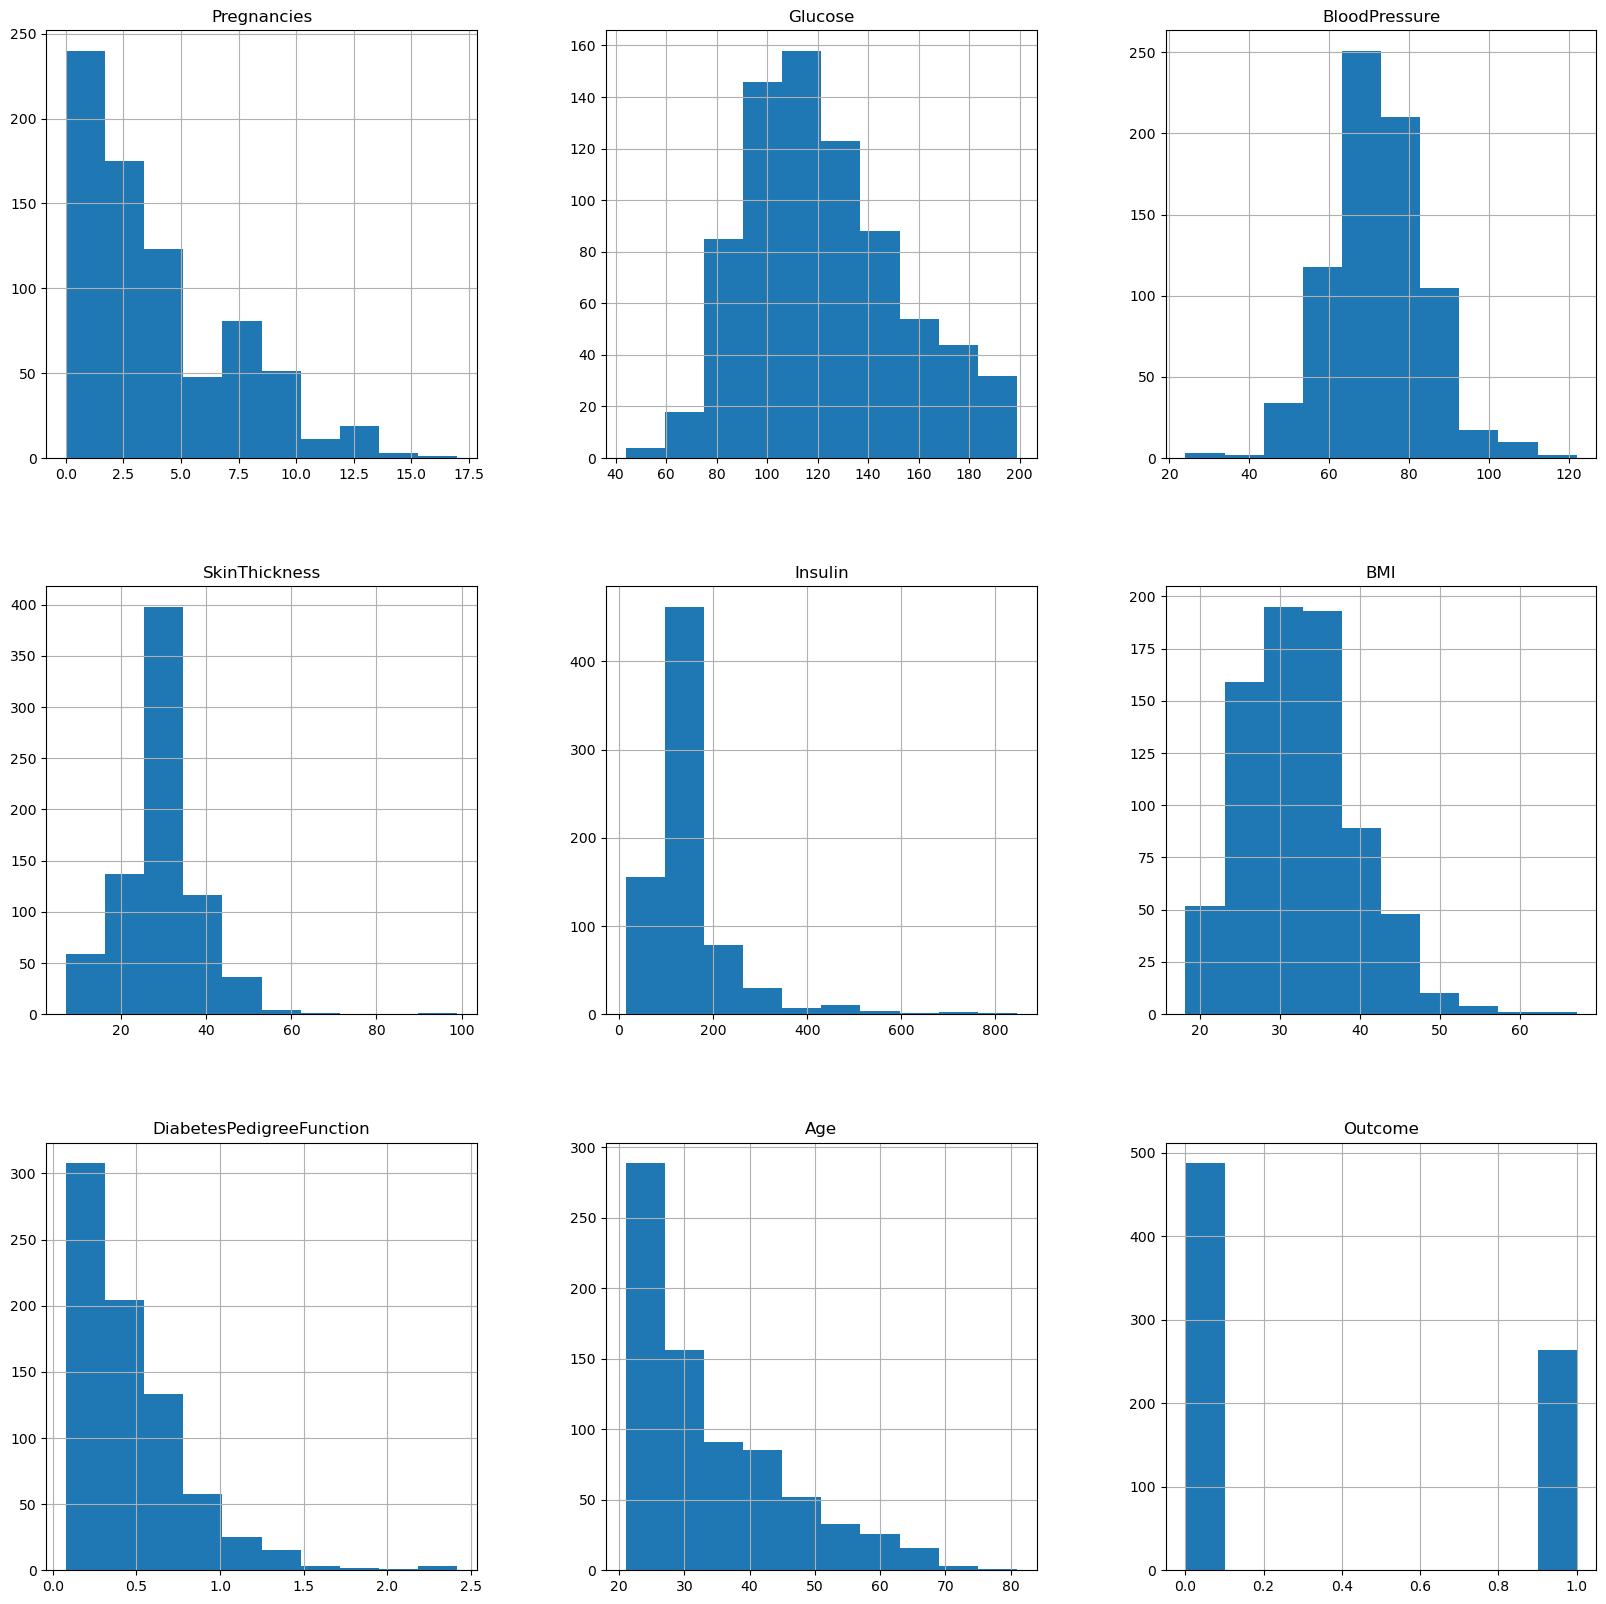

In [14]:
# Ploting histogram for each column after preprocessing
plot = data.hist(figsize = (20,20))

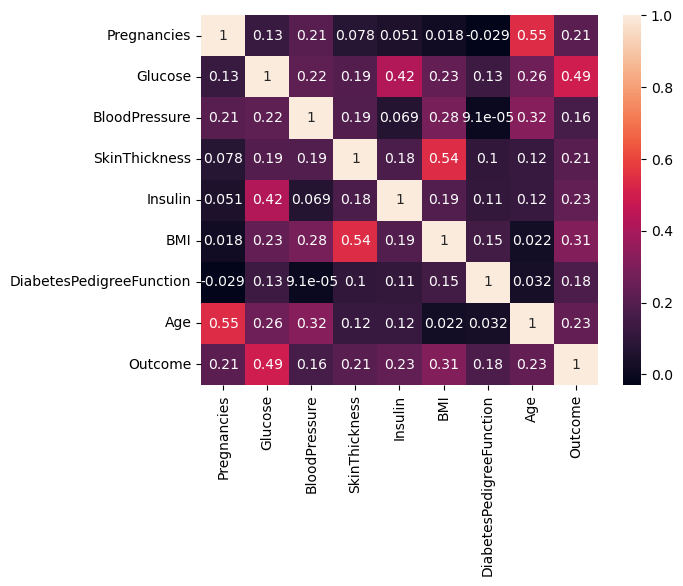

In [15]:
# Create a correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

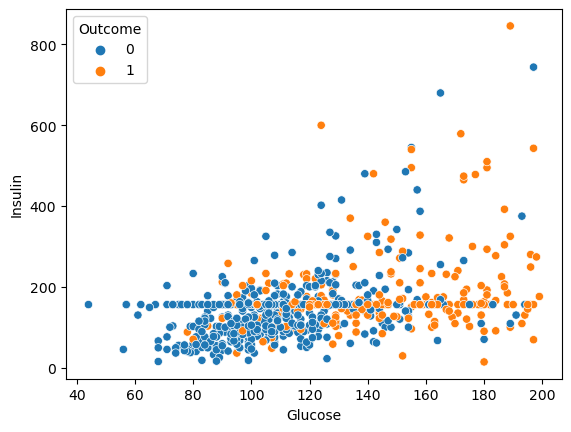

In [16]:
# Create a scatter plot
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=data)
plt.show()


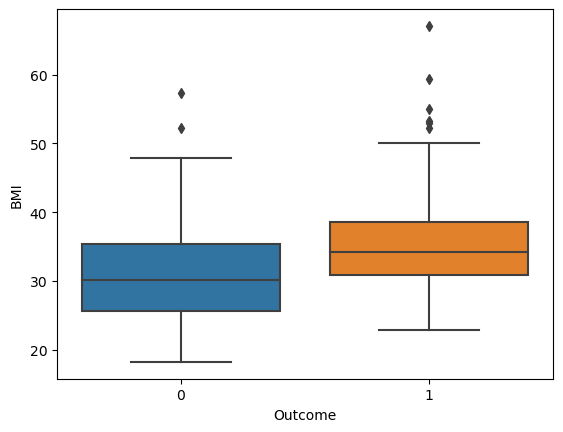

In [17]:
# Create a box plot
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.show()

### Data Preprocessing for Model

In [11]:
# Normalizing the dataset
scaled = StandardScaler()
inp =  pd.DataFrame(scaled.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
out = data.Outcome

In [13]:
# Check frist five rows of dataset
inp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.637110,0.852119,-0.031768,0.664401,0.892786,0.165409,0.466671,1.426086
1,-0.845274,-1.207994,-0.526041,-0.013829,-0.153005,-0.845521,-0.369975,-0.197622
2,1.230064,1.996626,-0.690798,-0.013829,0.028872,-1.322102,0.603081,-0.112164
3,-0.845274,-1.077194,-0.526041,-0.692059,-0.675900,-0.628893,-0.927739,-1.052206
4,-1.141751,0.492416,-2.667888,0.664401,0.165279,1.537386,5.501706,-0.026706


In [14]:
# Spliting the dataset into 66% trainging and 33% testing
inp_train, inp_test, out_train, out_test = train_test_split(inp, out, test_size=1/3, random_state=42)

### Model Implementation

In [15]:
# Initialize the classifiers
rf_c = RandomForestClassifier(random_state=42)
dt_c = DecisionTreeClassifier(random_state=42)
lr_c = LogisticRegression(random_state=42)

# Train the classifiers
rf_c.fit(inp_train, out_train)
dt_c.fit(inp_train, out_train)
lr_c.fit(inp_train, out_train)

# Make predictions on the test set
rf_pred = rf_c.predict(inp_test)
dt_pred = dt_c.predict(inp_test)
lr_pred = lr_c.predict(inp_test)

# Evaluate the classifiers
print("Random Forest:")
print("Accuracy:", round(accuracy_score(out_test, rf_pred), 4)*100)
print(classification_report(out_test, rf_pred))

print("\nDecision Tree:")
print("Accuracy:", round(accuracy_score(out_test, dt_pred), 4)*100)
print(classification_report(out_test, dt_pred))

print("\nLogistic Regression:")
print("Accuracy:", round(accuracy_score(out_test, lr_pred), 4)*100)
print(classification_report(out_test, lr_pred))

Random Forest:
Accuracy: 74.9
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       161
           1       0.70      0.53      0.60        90

    accuracy                           0.75       251
   macro avg       0.73      0.70      0.71       251
weighted avg       0.74      0.75      0.74       251


Decision Tree:
Accuracy: 71.31
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       161
           1       0.62      0.51      0.56        90

    accuracy                           0.71       251
   macro avg       0.69      0.67      0.67       251
weighted avg       0.70      0.71      0.71       251


Logistic Regression:
Accuracy: 77.69
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       161
           1       0.78      0.52      0.63        90

    accuracy                           0.78       251
   macro avg       0.78     

### Results Analysis

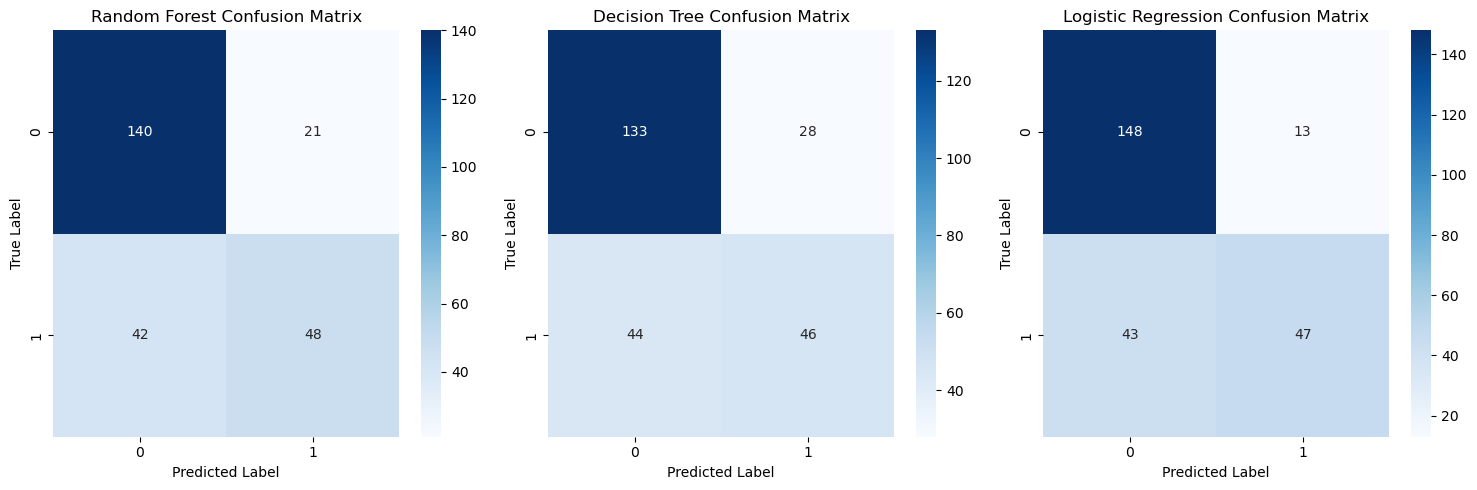

In [16]:
# Generate confusion matrices
rf_cm = confusion_matrix(out_test, rf_pred)
dt_cm = confusion_matrix(out_test, dt_pred)
lr_cm = confusion_matrix(out_test, lr_pred)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

### Hyperparameter Tuning

In [22]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lr_c, 
                           param_grid=param_grid, 
                           cv=5, scoring='accuracy')


# Fit the grid search to the data
grid_search.fit(inp_train, out_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_lr_c = grid_search.best_estimator_

# Make predictions on the test set
best_lr_pred = best_lr_c.predict(inp_test)

# Evaluate the model
print("Logistic Regression (with hyperparameter tuning):")
print("Accuracy:", round(accuracy_score(out_test, best_lr_pred), 3)*100)
print(classification_report(out_test, best_lr_pred))

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression (with hyperparameter tuning):
Accuracy: 76.5
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       161
           1       0.75      0.52      0.61        90

    accuracy                           0.76       251
   macro avg       0.76      0.71      0.72       251
weighted avg       0.76      0.76      0.75       251



### Resolve the False Positives for the Model Prediction

In [23]:
# Get predicted probabilities instead of class labels
lr_probs = lr_c.predict_proba(inp_test)[:, 1]


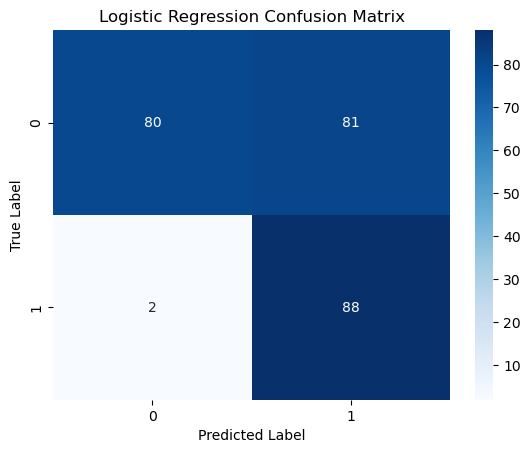

In [24]:
# Adjust the threshold
lr_pred_new = (lr_probs > 0.158).astype(int) 

lr_cm = confusion_matrix(out_test, lr_pred_new)

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()